<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285 - Computación Científica I / INF285 - Computación Científica</h1>
    <h1> Tarea 1: Remember your roots </h1>
    <h3> Benjamín Sebastián Gautier Ortiz</h3>
    <h4> 201460036-4</h4>
</center>
<p>
<center><a href = "mailto: benjamin.gautier.14@sansano.usm.cl">benjamin.gautier.14@sansano.usm.cl</a></center>
</p>
<center>Abril 2019</center>

---

## Contexto

La presente tarea tiene como objetivo el uso de algoritmos de búsquedas de ceros en 1D, como adaptarlos a un problema particular y que implicancias tiene el uso de cada uno, tanto desde el punto de vista de la aproximación de la solución como de la computación necesaria. Al final se presenta la interpretación gráfica de las soluciones obtenidas.

_Nota: En esta tarea no se puede utilizar ```sympy``` en los algoritmos numéricos, pero sí se puede utilizar para desarrollos intermedios, por ejemplo en la sección "1.- Construcción"._

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets

-------

## Problema

El universo de Marvel fue atacado duramente por Thanos en _Avenger Infinity War_. 
Sin embargo, los Avengers en conjunto con la Capitana Marvel tienen un plan para salvar al universo.
Lamentablemente, se han encontrado con la siguiente ecuación diferencial ordinaria que no pueden resolver:

\begin{align*}
\frac{dy}{dx}(x)&=y(x)\cos{(x+y(x))},\\
y(0)&=1,
\end{align*}

donde $x \in [0,100]$ y además sabemos que $-1000\leq y(x) \leq 1000$ para $x \in [0,100]$.
Afortunadamente, usted se ha dado cuenta que puede usar algoritmos numéricos para encontrar una aproximación numérica de $y(x)$ sobre una grilla de puntos $x_i=100\frac{i}{M}$, con $i\in\{0,1,\dots,M\}$.
Una estrategia para resolver este tipo de problemas es discretizar el dominio de la función, y en lugar de encontrar la función $y(x)$ algebraicamente, se encuentra una aproximación a $y(x_i)$ para cada $x_i$.

Note que ya conocemos el valor exacto de $y(x_0)=y(0)=1$ por la condición inicial, por lo que necesitamos obtener el siguiente valor $y(x_1)$ y así sucesivamente hasta $y(x_M)$.
Para hacer esto, primero hagamos un poco de desarrollo algebraico. 
Al integrar la ecuación diferencial entre $x_0$ y $x_1$ obtenemos:

\begin{equation*}
\int_{x_0}^{x_1} \dfrac{dy}{dx}(x) \, \mathrm{d}x  =  \int_{x_0}^{x_1} y(x)\,\cos{(x+y(x))} \, \mathrm{d}x.
\end{equation*}

Por el **teorema fundamental del cálculo**, esto es:

\begin{equation*}
 y(x_1)- y(x_0)   =  \int_{x_0}^{x_1} \! y(x)\cos{(x+y(x))} \, \mathrm{d}x.
\end{equation*}

Hasta este punto no se ha realizado ninguna aproximación.
Nótese que $y(x_1)$ es lo que buscamos y $y(x_0)$ es conocido, asi que vamos bien encaminados. 
Sin embargo necesitamos $y(x)$ para realizar la integral del lado derecho de la ecuación.
Entonces, ahora es un buen momento para realizar una aproximación numérica.
En este caso, utilizaremos el método de integración de trapecio.
Este consiste en que una integral definida $\int_a^b\,f(x)\,\mathrm{d}x$ es obtenida por medio de la siguiente expresión $\dfrac{f(a)+f(b)}{2}(b-a)+\text{Error}$, i.e. $\int_a^b\,f(x)\,\mathrm{d}x\approx\dfrac{f(a)+f(b)}{2}(b-a)$.
En la siguiente figura se muestra un sketch de la aproximación:

<img src="Trapezoidal-Rule.png" style="width:50%">

donde la función a integrar es la curva en rojo, el valor de la integral, en este caso, corresponde al área bajo la curva en gris, la aproximación de la integral $\int_a^b\,f(x)\,\mathrm{d}x$ por medio de un trapecio es la área achurada en celeste y el Error es la diferencia entre en valor de la integral y la aproximación por trapecio. 
Por ahora solo es necesario entender que el Error _debería_ disminuir a medida que el largo del intervalo $[a,b]$ sea más pequeño. Entonces, en nuestro caso esto se reduce a:

\begin{equation*}
 y(x_1)- y(x_0)   \approx  \dfrac{x_1-x_0}{2}\left(y(x_1)\cos{(x_1+y(x_1))}+y(x_0)\cos{(x_0+y(x_0))}\right).
\end{equation*}

Lo que se transforma en el siguiente método numérico:

\begin{equation*}
 y_1- y_0   =  \dfrac{x_1-x_0}{2}\left(y_1\cos{(x_1+y_1)}+y_0\cos{(x_0+y_0)}\right),
\end{equation*}

donde lo conocido es $x_0$, $x_1$ y $y_0$ y lo que se busca es $y_1$. En el caso general, obtenemos
la siguiente secuencia de ecuaciones que se deben resolver:

\begin{equation*}
 y_{i+1}- y_i   =  \dfrac{x_{i+1}-x_i}{2}\left(y_{i+1}\cos{(x_{i+1}+y_{i+1})}+y_i\cos{(x_i+y_i)}\right),
\end{equation*}

para $i\in\{0,1,\dots,M\}$, $x_i=100\frac{i}{M}$ y $y_0=1$. _Con esta solución, los Avengers y la capitana Marvel tendrán todas la herramientas para derrotar a Thanos!_

**Note: From now on $M$ will be denoted as $M\_$intervals in the code.**

## Preguntas
---

## 0.- Introducción

Para enfrentar el problema y poder realizar la siguiente sección, se comenzó por plantear la serie de ecuaciones a resolver utilizando sympy. A continuación se muestra como se infirió la solución:

In [3]:
import sympy
#generamos simbolos
ysym = (1,)+ sympy.symbols('y1:11')
def my_f(y_ii,y_i,x_ii, x_i):
    fun = y_ii - y_i - ((x_ii-x_i)/2)*(y_ii*sympy.cos(x_ii+y_ii) + y_i*sympy.cos(x_i+y_i))
    return fun

def make_x(M=10):
    return np.array([ 100*(i/M) for i in range(0,M+1) ],dtype=np.float32)

xs = make_x() #M=10
#solo mostramos la primera ecuacion
for i in range(1,2):
    print(my_f(ysym[i],ysym[i-1],xs[i],xs[i-1]))

y_1 = lambda y: -5.0*y*np.cos(y + 10.0) + y - 3.7015115293407

-5.0*y1*cos(y1 + 10.0) + y1 - 3.7015115293407


La ecuación anterior es la primera de la sucesión de ecuaciones, notar que esta incluye el *coseno* por lo que alude a que las raices son múltiples en el intervalo $-1000<y<1000$. Notar en el siguiente gráfico las soluciones en el intervalo $[-10,10]$, son mas de dos; por lo que debemos pensar bien cual será un rango aceptable para la búsqueda de las raíces. 

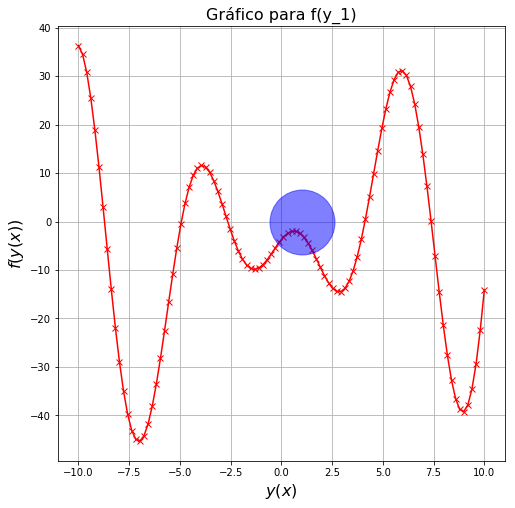

In [4]:
def find_root_manually(r=2.0): 
    x = np.linspace(-10,10,100)
    plt.figure(figsize=(8,8))
    plt.plot(x,y_1(x),'x-',color='red')
    plt.plot(1,0,'bo', markersize=65, alpha=0.5)
    plt.grid()
    plt.ylabel('$f(y(x))$',fontsize=16)
    plt.xlabel('$y(x)$',fontsize=16)
    plt.title('Gráfico para f(y_1)',fontsize=16)
    plt.show()
find_root_manually()

## 1.- Construcción
Explique cómo usar los tres métodos de búsqueda de raíces vistos en clases (bisección, iteración de punto fijo y método de Newton) para resolver la secuencia de problemas mencionados anteriormente.
Debe explicitar completamente todo lo que necesita para luego poder implementar cada método.
Sea claro y explícito en su estrategia. Se indicará en cada método lo mínimo que debe explicar.
Ver [04_roots_of_1D_equations.ipynb](https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb) para referencia.


### Respuestas

Analizando la pregunta nos damos cuenta que buscamos valores de $y(x_{i+1})$ tal que la siguiente ecuación se cumpla: 

$$
y(x_{i+1}) - y(x_i) = \dfrac{x_{i+1} - x_i}{2}(y(x_{i+1}) \cos{x_{i+1}} + y(x_{i+1})) + y_i \cos{x_i + y_i})
$$  

En donde calculamos $x_i = 100(\dfrac{i}{M}), i \in [0,1,2,...,M]$ donde $M$ es la precisión para la búsqueda del resultado. 

#### Método de la Bisección
- Hint: Debe escribir explícitamente cual es la función 'f' a utilizar y los intervalos $[a,b]$ a utilizar.

Para el método de la bisección necesitamos explicitar una función $f$ y un intervalo de búsqueda para confinar la raíz de la ecuación. Por lo tanto vamos a plantear una función $f(y(x_{i+1}))$ tal que $f(y(x_{i+1})) = 0$:

Sea $y(x_{i+1})$ la variable, $y(x_i), x_i, x_{i+1}$ constantes conocidas
$$
f(y(x_{i+1})) = y(x_{i+1}) - y(x_i) - (\dfrac{x_{i+1}-x_i}{2})(y(x_{i+1}) \cos{(x_{i+1}+y(x_{i+1}))} + y(x_i) \cos{(x_i+y(x_i))})
$$
Dada la ecuación anterior, buscamos encontrar el valor de $y(x_{i+1})$ tal que la función en este valor sea cero:
$$
f(y(x_{i+1})) = 0
$$

Además el método nos pide un intervalo $[a,b]$ para confinar la raíz. Primero debemos notar que la función original es una función continua, por lo que los valores $y(x_i)$ deben ser puntos cercanos a $y(x_{i-1})$ y $y(x_{i+1})$, por lo que de ahí podemos deducir lo siguiente para los intervalos en la secuencia de ecuaciones:

Primero sabemos que $ x_0 = 0 \rightarrow y(x_0) = 1$, por lo que el siguiente punto $y(x_1)$ se espera que sea un valor cercano a $y(x_0)$, dependiendo del valor de $M$; ésta es una variable de precisión y nos permite construir un conjunto de $M$ puntos $x_i$. Por lo tanto debemos utilizar algún tipo de heurística para conducir a valores buenos.
La heurística a utilizar será la siguiente: **En cada iteración elegir el intervalo $[a,b]$ tal que en una vecindad pequeña se encuentre el cero de la función objetivo, dependiendo de la precisión que busquemos (i.e: M)**.  
Por lo anterior vamos a establecer un intervalo aceptable para cada iteración o búsqueda de solución. 

$$
y_{i+1} \in [y_i - \dfrac{100}{M}, y_i + \dfrac{100}{M}]
$$

#### Iteración de punto fijo
- Hint: Explique cual será su _initial guess_ y la función 'g' a utilizar. Se espera que sea convergente.  

Vamos a encontrar la raíz de la función ocupando el método iterativo de punto fijo, para esto debemos establecer una función $g(y(x_{i+1}))$ tal que $g(y(x_{i+1})) = y(x_{i+1})$.

Establecemos la función $g$ como:  
$$
g(y(x_{i+1})) = y(x_i) + \dfrac{x_{i+1} - x_i}{2}( y(x_{i+1}) \cos{(y(x_{i+1}) + x_{i+1})} +  y(x_{i}) \cos{(y(x_{i}) + x_i))}) = y(x_{i+1})
$$

Al resolver la ecuación i-esima tendremos como _initial guess_ el valor de solución de la ecuación i-1; para esto, sea $u = y(x_{i+1}$, la búsqueda de la raíz de la ecuación "i-ésima".

$$
u_{0} = y(x_{i})  \\
u_{1} = g(u_{0})
$$


#### Método de Newton
- hint: Debe explicar cual es el 'f', su derivada y el _initial guess_ a usar.

Para el método de Newton debemos definir una función $f$, su derivada $f'$ y un _initial guess_ para realizar los cálculos iterando. Para esto definimos nuestra función:

$$
f(y(x_{i+1})) = y(x_{i+1}) - y(x_{i}) - \dfrac{x_{i+1}-x_i}{2}(y(x_{i+1}) \cos{(y(x_{i+1}) + x_{i+1})} + y(x_{i}) \cos{(y(x_{i}) + x_{i})}) \\
$$

Con $y(x_{i}), x_{i+1}, x_i$ constantes conocidas.

Donde buscamos un $y(x_{i+1})$ tal que $f(y(x_{i+1})) = 0$ , en cada ecuación de la serie de ecuaciones subyacentes al dividir el intervalo en $M$ intervalos.

Luego, si dividimos el intervalo en $M$ intervalos entonces tenemos una ecuación por cada intervalo. Por lo tanto tenemos $M$ ecuaciones a resolver. Por lo que debemos hacer una seguidilla de resolución de ecuaciones (M ecuaciones).

Si tenemos $M$ ecuaciones a resolver, las resolveremos secuencialmente desde la $0$ a la $M$; por lo tanto, sea
$U = y(x_i)$, la variable que buscamos encontrar tal que la función sea cero. Transformando nuestra ecuación:

$$
f(U) = U - y(x_{i}) - \dfrac{x_{i+1}-x_i}{2}(U \cos{(U + x_{i+1})} + y(x_{i}) \cos{(y(x_{i}) + x_{i})}) \\
$$
Definiendo nuestro $f'(U)$:
$$
f'(U) = 1 - \dfrac{x_{i+1}-x_i}{2}(\cos{(U + x_{i+1})} - U\sin{(U + x_{i+1})}) \\
$$

Donde el _initial guess_ que utilizaremos para resolver cada una de las $M$ ecuaciones viene dado por:
$$
\text{initial guess}_{i} = y_{i-1}, i \in {1,2,...,M}
$$

## 2.- Implementación
Aquí usted debe implementar cada uno de los algoritmos propuestos en la pregunta anterior de la forma que los explicó. 
Usted tendrá que considerar un presupuesto $N\_budget$ de *operaciones elementales*, es decir, cada vez que en su implementación realice una operación elemental la debe descontar de su presupuesto y el algoritmo debe retornar el vector $\mathbf{y}$ de soluciones encontradas hasta donde pudo obtener una solución.
Si el presupuesto es menor a lo que necesita para poder obtener las $M\_$intervals raices, el vector debe retornar NaN en las componentes que no pudo obtener. Condicionales no se consideran operaciones elementales pero si hubieran operaciones elementales dentro de un condicional debén incluirse y descontarse del presupuesto cada vez que se realicen.
El costo de cada operación viene dado por la siguiente tabla: <br> 

|Operaciones elementales|Costo|
|:----------:|:-------------:|
| +,-,*,/ |  1 |
| Funciones Elementales (trig, etc) |    50   |

In [5]:
## Algoritmos sacados del git del profesor coordinador del ramo Claudio Torres.
## Pequeños cambios para no imprimir toda la informacion y controlar el N_budget

def bisect(f, a, b, tol=1e-8,N_budget=1e4):
    fa = f(a)
    fb = f(b)
    i = 0
    # Just checking if the sign is not negative => not root  necessarily 
    N_budget -= 1
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return(None,N_budget);
  
    #Printing the evolution of the computation of the root
#     print(' i |     a     |     c     |     b     |     fa    |     fc     |     fb     |   b-a')
#     print('----------------------------------------------------------------------------------------')
    
    while(b-a)/2 > tol:
        c = (a+b)/2.
        N_budget -= 4
        fc = f(c)
#         print('%2d | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f | %.7f' %
#               (i+1, a, c, b, fa, fc, fb, b-a))
        # Did we find the root?
        if fc == 0:
            print('f(c)==0')
            break
        elif np.sign(fa*fc) < 0:
            N_budget -= 1
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
        
    xc = (a+b)/2.
    N_budget-=2
    return (xc, N_budget);

def fpi(g, x0, k, flag_cobweb=False, N_budget=1e4):
    x = np.empty(k+1)
    x[0] = x0
    error_i = np.inf
    
#     print(' i |     x(i)     |    x(i+1)    ||x(i+1)-x(i)| | e_i/e_{i-1}')
#     print('--------------------------------------------------------------')
    
    for i in range(k):
        x[i+1] = g(x[i])
        error_iminus1 = error_i
        error_i = abs(x[i+1]-x[i])
#         print('%2d | %.10f | %.10f | %.10f | %.10f' %
#               (i,x[i],x[i+1],error_i,error_i/error_iminus1))
        N_budget -= 2
    return (x[-1], N_budget);

def newton_method(f, fp, x0, rel_error=1e-8, m=1,N_budget=1e4):
    #Initialization of hybrid error and absolute
    hybrid_error = 100
    error_i = np.inf
    
#     print('i |     x(i)     |     x(i+1)   |      |x(i+1)-x(i)|     |  e_i/e_{i-1} | e_i/e_{i-1}^2')
#     print('----------------------------------------------------------------------------------------')
    
    #Iteration counter
    i = 1
    while (hybrid_error > rel_error and hybrid_error < 1e12 and i < 1e4):
        #Newton's iteration
        x1 = x0-m*f(x0)/fp(x0)
        N_budget -= 3
        #Checking if root was found
        if f(x1) == 0.0:
            hybrid_error = 0.0
            break
        
        #Computation of hybrid error
        hybrid_error = abs(x1-x0)/np.max([abs(x1),1e-12])
        N_budget -= 5 #max es una resta, restamos izq menos der, si es menor que cero, der es max 
        #Computation of absolute error
        error_iminus1 = error_i
        error_i = abs(x1-x0)
        N_budget -= 2
        #Increasing counter
        i += 1
        
        #Showing some info
#         print("%d | %.10f | %.10f | %.20f | %.10f | %.10f" % 
#               (i, x0, x1, error_i, error_i/error_iminus1, error_i/(error_iminus1**2)))
        #Updating solution
        x0 = x1
    
    #Checking if solution was obtained
    if hybrid_error < rel_error: 
        return (x1, N_budget);
    elif i>=1e4:
        print('Newton''s Method diverged. Too many iterations!!')
        return (None, N_budget);
    else:
        print('Newton''s Method diverged!')
        return (None, N_budget);

In [6]:
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def bisect_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    x = np.linspace(0,100,M_intervals+1)
    y[0] = 1 #initial condition
    
    f = lambda y: a*(y*np.cos(x1+y) + b) - y + y0
    i = 1
    stop = M_intervals +1
    dispersion_constant = 100.0/M_intervals
    while i<(stop) and N_budget > 0:
        x0 = x[i-1]
        y0 = y[i-1]
        x1 = x[i]
        a = (x1 - x0)/ 2
        b = y0*np.cos(y0 + x0)
        y[i], N_budget = bisect(f,y0-(dispersion_constant),y0+(dispersion_constant),tol=tol,N_budget = N_budget)
        i += 1
        N_budget -= 56
    print(N_budget, i)
    return y

'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def fpi_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    x = np.linspace(0,100,M_intervals+1)
    y[0] = 1 #initial condition
    
    f1 = lambda y: a*( y*np.cos(x1+y)+ b ) + y0
    i = 1
    stop = M_intervals +1
    while i<(stop) and N_budget > 0:
        x0 = x[i-1]
        y0 = y[i-1]
        x1 = x[i]
        a = (x1 - x0)/ 2
        b = y0*np.cos(y0 + x0)
        y[i], N_budget = fpi(f1,y0,15,flag_cobweb=False, N_budget = N_budget)
        i += 1
        N_budget -= 53
        
    return y

'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def newton_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    x = np.linspace(0,100,M_intervals+1)
    y[0] = 1 # initial condition
    
    f = lambda y: a*(y*np.cos(x1+y) + b) - y + y0
    fp = lambda y: -1 + a*( np.cos(y+x1) - y*np.sin(y+x1) )
    i = 1
    stop = M_intervals +1
    while i<stop and N_budget > 0:
        x0 = x[i-1]
        y0 = y[i-1]
        x1 = x[i]
        a = (x1 - x0)/ 2
        b = y0*np.cos(y0 + x0)
        y[i], N_budget = newton_method(f,fp,y0,rel_error=1e-14, N_budget = N_budget)
        i += 1
        N_budget -= 54
    
    return y

# bisect_ode_solver(M_intervals = 100, N_budget = 1e6)
# fpi_ode_solver(M_intervals=100,N_budget=1e6)
# newton_ode_solver(M_intervals=100,N_budget=1e4)

## 3.- Visualización y Conclusiones
Utilice el siguiente código para visualizar sus resultados. Se incluye esta función para que pueda visualizar sus resultados.

In [7]:
def plot_solutions_of_ODE(M_intervals=100,N_budget=1e4,log_tol=-8,shift=0.1):
    tol = 10**log_tol
    x        = np.linspace(0,10,M_intervals+1)
    y_bisec  = bisect_ode_solver(M_intervals,N_budget,tol)
    y_fpi    = fpi_ode_solver(M_intervals,N_budget,tol)
    y_newton = newton_ode_solver(M_intervals,N_budget,tol)
    plt.figure(figsize=(8,8))
    plt.plot(x,y_bisec+shift,'b-',label='Bisección: y+'+str(shift))
    plt.plot(x,y_fpi,'m-',label='FPI: y')
    plt.plot(x,y_newton-shift,'g-',label='Newton: y-'+str(shift),linewidth=3,alpha=0.5)
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title('Plot of solutions with shift for visualization purposes')
    plt.grid(True)
    plt.show()
    
interact(plot_solutions_of_ODE,M_intervals=(100,100000,100),N_budget=(100,1000000,100),log_tol=(-14,-1,1),shift=(-1,1,0.01))

interactive(children=(IntSlider(value=100, description='M_intervals', max=100000, min=100, step=100), IntSlide…

<function __main__.plot_solutions_of_ODE(M_intervals=100, N_budget=10000.0, log_tol=-8, shift=0.1)>

## Conclusiones

1. Primero observamos que la función planteada tiene como solución a una familia de funciones que cumplen con la pendiente dada ($\dfrac{dy}{dx}$); por lo que en ese momento se sospecha que existe mas de una solución posible.
2. Al tener que plantear el algoritmo de bisección se construyó una función $f(y(x_{i+1}))$, la cual tiene el propósito de encontrar el punto o aproximación numérica de $y(x_{i+1})$ tal que evaluado en $f$, sea cero. Plantear la ecuación no es mas que despejar la función planteada e igualarla a cero. Por otro lado, necesitamos tener un intervalo para la búsqueda de la raíz; para esto seguimos el siguiente razonamiento: Si $M$ es grande significa que los puntos $y(x_{i+1})$ estarán mas cerca unos de los otros, por lo que se espera que $y(x_{i+1})$ y $y(x_{i})$ (el anterior) sean números próximos para que se cumpla la _continuidad de la función_. 
3. Por lo anterior se creó una función que dependiendo de $M$ se buscará en un rango inversamente proporcional para los posibles valores de $y(x_{i+1})$ con el objetivo de que la búsqueda de la raíz sea tan cercana a el valor anterior ($y(x_i)$):
$$
[a_i,b_i] = [ y_{i-1} - (\dfrac{100}{M}) , y_{i-1} + (\dfrac{100}{M})] 
$$
La ecuación anterior fué obtenida gracias al tanteo mediante la computación, lo importante a rescatar es que el denominador $M$, es el factor que nos dice cual es el rango de búsqueda para la solución (si $M$ es grande se busca en un rango grande, en cambio si es pequeño el rango será pequeño también). Por otro lado, el numerador ($100$) lo usamos ya que es un factor conveniente de búsqueda (dada su relación con M).
4. Para el segundo método (FPI), tenemos varías posibilidades de funciones, que mediante operaciones algeibraicas podemos obtenerlas. Se corrió el método para las funciones:
\begin{equation}
h(y_{i+1}) = \dfrac{1}{\cos{(y_{i+1} + x_{i+1})}}( \dfrac{2(y_{i+1} - y_{i})}{x_{i+1} - x_{i}} - y_i \cos{(x_{i} + y_{i})} ) = y_{i+1}
\end{equation}  
\begin{equation}
g(y_{i+1}) = y_{i+1} + \dfrac{x_{i+1} - x_{i}}{2}( y_{i+1} \cos{ (y_{i+1} + x_{i+1}) } + y_{i} \cos{ (y_{i} + x_{i}) }) = y_{i+1}
\end{equation}  
Donde $h$ divergió y $g$ no, por lo que elegimos $g$; se puede ver la tasa de convergencia en las funciones implementadas, basta descomentar los _print_ y podemos notar que para $g$ la tasa de convergencia es menor a uno en la mayoría de los casos y en algunos muy cercano a uno; aludiendo convergencia lineal. Gracias a esto podemos darnos cuenta que no todas las funciones son una buena función para el método de punto fijo. 
6. Por otro lado, tenemos el método de Newton, el cual se caracteriza por tener convergencia cuadrática, algo bastante claro al tener un presupuesto de operaciones bajo (N_budget), ya que es el método que tiene un número mas grande de puntos representativos de la curva $y(x)$.
7. Cabe mencionar lo fuerte que es la relación de $M$ con la exactitud de aproximación, al tener uno mas grande obtenemos puntos mas exactos y podemos representar más puntos en la grilla, por ende, obteniendo una mejor aproximación.
8. Por otro lado, si el shift es 0 las curvas se solapan, lo que quiere decir que los puntos representados son buenos y exactos. También podemos decir lo mismo de los métodos, los tres obtienen los mismos puntos; pero la radical diferencia se encuentra en el número de operaciones elementales/aritméticas necesarias para llegar a una buena aproximación (tannto como la tolerancia ingresado lo permita).
9. Finalmente, podemos hacer un ranking de cual es el mejor método para resolver los problemas:  Newton, iteración de punto fijo y bisección, siendo esta última la que necesita más operaciones aritméticas/elementales para llegar a una buena aproximación. En contraste del método de Newton, que con un N_budget bajo obtiene la mayor cantidad de puntos representativos. 



-------

# Referencias

- Análisis numérico Segunda Edición, Timothy Sauer.
- Apuntes del ramo (v0.538).
- Github de Claudio Torres [notebooks](https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb).